In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from math import sqrt

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# housing = pd.read_csv('/content/drive/MyDrive/Cse422 final Project/work.csv')
# compare = pd.read_csv('/content/drive/MyDrive/Cse422 final Project/dt.csv') #? FOR COMPARISON
housing = pd.read_csv('sample_data/work.csv')
compare = pd.read_csv('sample_data/dt.csv') 
housing.head(20)

,Id,LotArea,Street,Alley,Utilities,Neighborhood,BldgType,HouseStyle,YearBuilt,RoofStyle,Foundation,Electrical,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SaleCondition,SalePrice
0,1,8450.0,Pave,NaN,AllPub,CollgCr,1Fam,2Story,2003.0,Gable,PConc,SBrkr,1710.0,2.0,3.0,1.0,0.0,2.0,Normal,208500
1,2,9600.0,Pave,NaN,AllPub,Veenker,1Fam,1Story,1976.0,Gable,CBlock,SBrkr,1262.0,2.0,3.0,1.0,1.0,2.0,Normal,181500
2,3,11250.0,Pave,NaN,AllPub,CollgCr,1Fam,2Story,2001.0,Gable,PConc,SBrkr,1786.0,2.0,3.0,1.0,1.0,2.0,Normal,223500
3,4,9550.0,Pave,NaN,AllPub,Crawfor,1Fam,2Story,1915.0,Gable,BrkTil,SBrkr,1717.0,1.0,3.0,1.0,1.0,3.0,Abnorml,140000
4,5,14260.0,Pave,NaN,AllPub,NoRidge,1Fam,2Story,2000.0,Gable,PConc,SBrkr,2198.0,2.0,4.0,1.0,1.0,3.0,Normal,250000
5,6,14115.0,Pave,NaN,AllPub,Mitchel,1Fam,1.5Fin,1993.0,Gable,Wood,SBrkr,1362.0,1.0,1.0,1.0,0.0,2.0,Normal,143000
6,7,10084.0,Pave,NaN,AllPub,Somerst,1Fam,1Story,2004.0,Gable,PConc,SBrkr,1694.0,2.0,3.0,1.0,1.0,2.0,Normal,307000
7,8,10382.0,Pave,NaN,AllPub,NWAmes,1Fam,2Story,1973.0,Gable,CBlock,SBrkr,2090.0,2.0,3.0,1.0,2.0,2.0,Normal,200000
8,9,6120.0,Pave,NaN,AllPub,OldTown,1Fam,1.5Fin,1931.0,Gable,BrkTil,FuseF,1774.0,2.0,2.0,2.0,2.0,2.0,Abnorml,129900
9,10,7420.0,Pave,NaN,AllPub,BrkSide,2fmCon,1.5Unf,1939.0,Gable,BrkTil,SBrkr,1077.0,1.0,2.0,2.0,2.0,1.0,Normal,118000


In [ ]:
housing.describe() #? COUNT SHOWS US ALL VALUES OUT OF 1460

,Id,LotArea,YearBuilt,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SalePrice
count,1460.000000,1459.000000,1453.000000,1445.000000,1454.000000,1452.000000,1455.000000,1456.000000,1456.000000,1460.000000
mean,730.500000,10516.469500,1971.211287,1515.332872,1.563961,2.865702,1.046735,0.611264,1.765110,180921.195890
std,421.610009,9984.677869,30.204858,527.206526,0.551262,0.817120,0.220700,0.644285,0.746892,79442.502883
min,1.000000,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,7549.000000,1954.000000,1128.000000,1.000000,2.000000,1.000000,0.000000,1.000000,129975.000000
50%,730.500000,9477.000000,1972.000000,1459.000000,2.000000,3.000000,1.000000,1.000000,2.000000,163000.000000
75%,1095.250000,11603.000000,2000.000000,1779.000000,2.000000,3.000000,1.000000,1.000000,2.000000,214000.000000
max,1460.000000,215245.000000,2010.000000,5642.000000,3.000000,8.000000,3.000000,3.000000,4.000000,755000.000000


In [ ]:
housing.shape

(1460, 20)

In [ ]:
(housing.isnull().sum())

Id                  0
LotArea             1
Street              0
Alley            1369
Utilities          12
Neighborhood        7
BldgType           11
HouseStyle          6
YearBuilt           7
RoofStyle           6
Foundation          8
Electrical         13
GrLivArea          15
FullBath            6
BedroomAbvGr        8
KitchenAbvGr        5
Fireplaces          4
GarageCars          4
SaleCondition       1
SalePrice           0
dtype: int64

# PRE PROCESSING

### REMOVED COLUMNS WITH MOST AMOUNT OF NULL VALUES

In [ ]:
housing.drop(['Alley'], axis=1, inplace=True)
housing.drop(['Id'], axis=1, inplace=True)

housing.shape

(1460, 18)

In [ ]:
(housing.isnull().sum())

LotArea           1
Street            0
Utilities        12
Neighborhood      7
BldgType         11
HouseStyle        6
YearBuilt         7
RoofStyle         6
Foundation        8
Electrical       13
GrLivArea        15
FullBath          6
BedroomAbvGr      8
KitchenAbvGr      5
Fireplaces        4
GarageCars        4
SaleCondition     1
SalePrice         0
dtype: int64

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

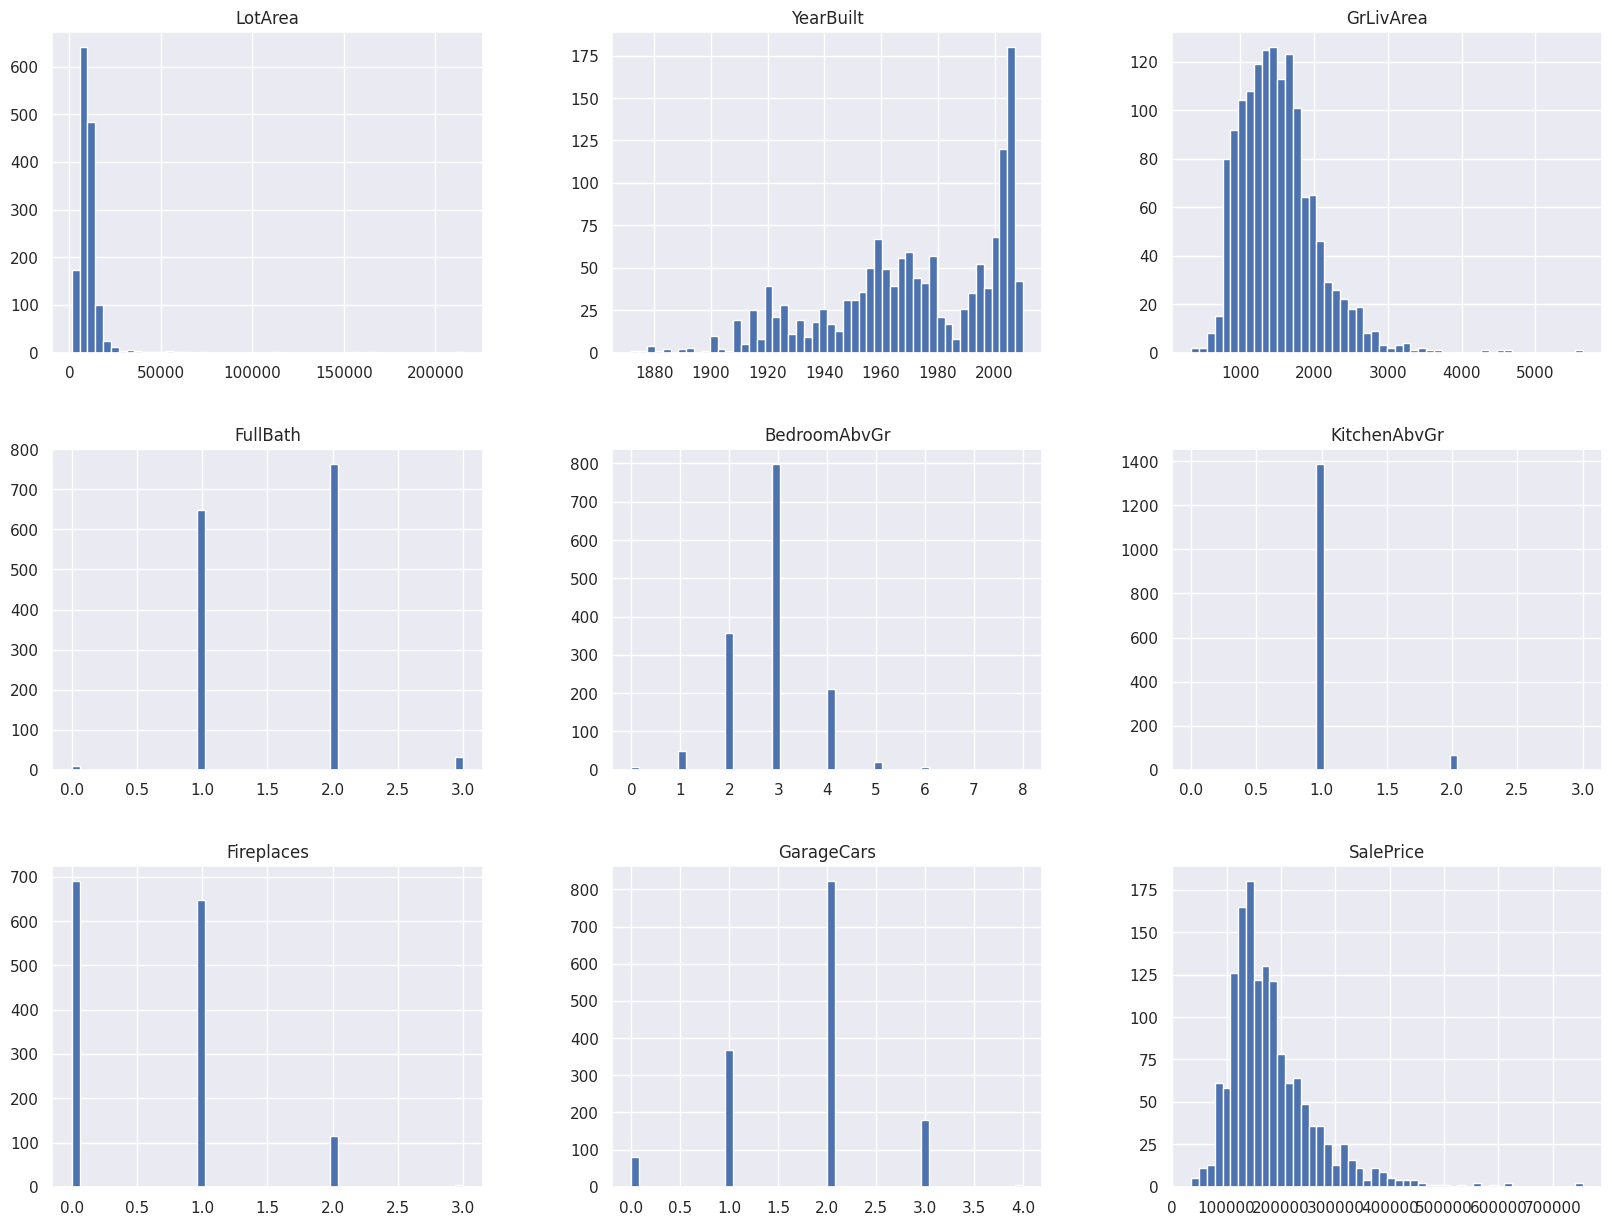

In [ ]:
%matplotlib inline

housing.hist(bins=50,figsize=(20,15))

### REPLACED INTEGER COLUMNS WITH MEAN

In [ ]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

columns_to_impute = [0, 6, 10, 11, 12, 13, 14, 15]
df_to_impute = housing.iloc[:, columns_to_impute]
imputer1.fit(df_to_impute)
housing_imputed = pd.DataFrame(imputer1.transform(
    df_to_impute), columns=df_to_impute.columns)

housing.iloc[:, columns_to_impute] = housing_imputed

In [ ]:
(housing.isnull().sum())

LotArea           0
Street            0
Utilities        12
Neighborhood      7
BldgType         11
HouseStyle        6
YearBuilt         0
RoofStyle         6
Foundation        8
Electrical       13
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Fireplaces        0
GarageCars        0
SaleCondition     1
SalePrice         0
dtype: int64

### REPLACED STRING COLUMNS WITH MOST FREQUENT VALUES

In [ ]:
imputer2 = SimpleImputer(strategy='most_frequent')

string_imputed = ['Utilities', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing[string_imputed] = imputer2.fit_transform(housing[string_imputed])

#### CHECK IF SALE PRICE COLUMN HAS ANY NEGATIVE VALUES

In [ ]:
if (housing['SalePrice'] < 0).any():
    print("Sale Price column has negative values")
else:
    print("Sale Price column does not have negative values")

Sale Price column does not have negative values


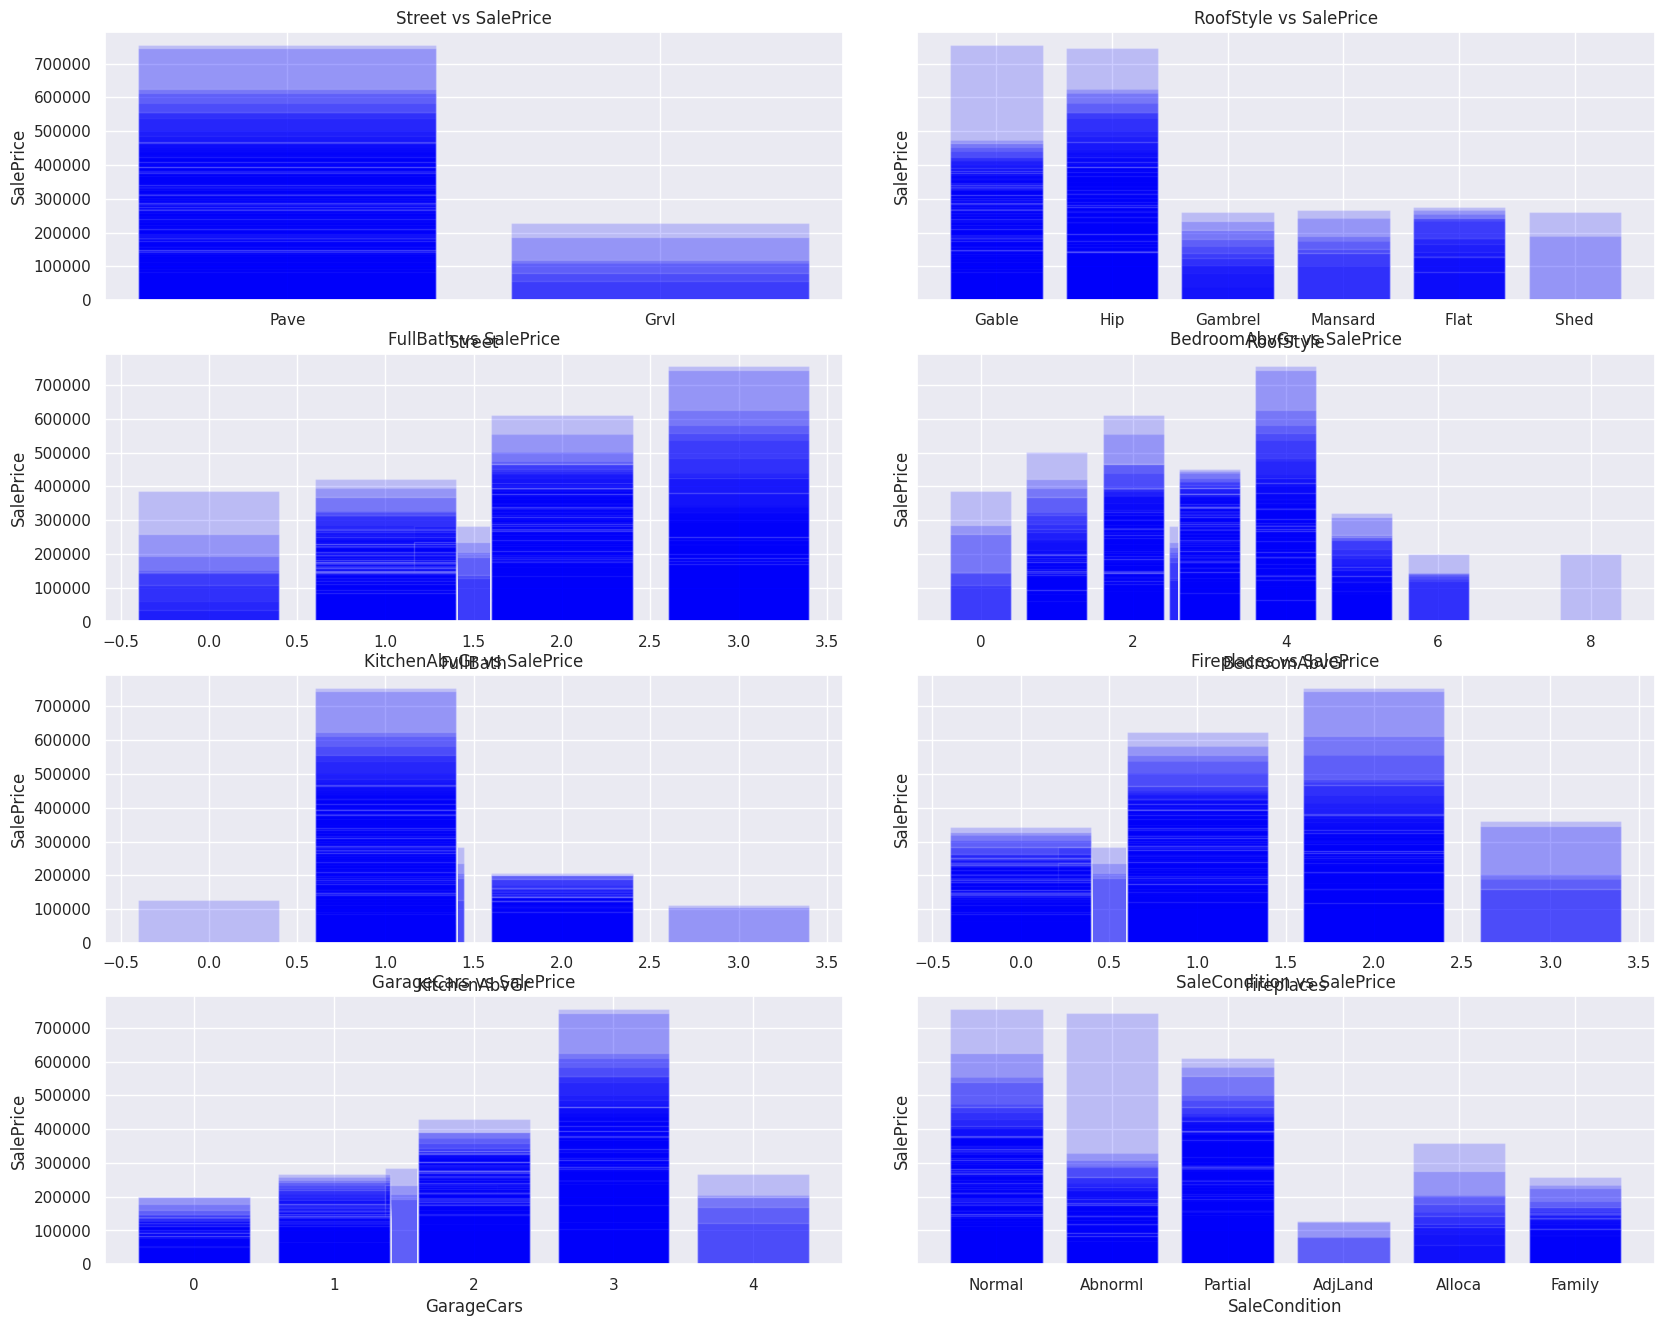

In [ ]:
columns_to_plot = [1, 7, 11, 12, 13, 14, 15, 16]
target = "SalePrice"

figure, axs = plt.subplots(len(columns_to_plot) // 2 + len(columns_to_plot) %
                        2, 2, figsize=(20, len(columns_to_plot) * 2), sharey=True, squeeze=True)

for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].bar(housing.iloc[:, column], housing[target], color='Blue', alpha=0.2)
    axs[i // 2, i % 2].set_xlabel(housing.columns[column])
    axs[i // 2, i % 2].set_ylabel(target)
    axs[i // 2, i % 2].set_title(f'{housing.columns[column]} vs {target}')

figure.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()

### PRE PROCESSED DATA

In [ ]:
housing.info() #? FOCUS ON THE NON-NULL COUNT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   float64
 1   Street         1460 non-null   object 
 2   Utilities      1460 non-null   object 
 3   Neighborhood   1460 non-null   object 
 4   BldgType       1460 non-null   object 
 5   HouseStyle     1460 non-null   object 
 6   YearBuilt      1460 non-null   float64
 7   RoofStyle      1460 non-null   object 
 8   Foundation     1460 non-null   object 
 9   Electrical     1460 non-null   object 
 10  GrLivArea      1460 non-null   float64
 11  FullBath       1460 non-null   float64
 12  BedroomAbvGr   1460 non-null   float64
 13  KitchenAbvGr   1460 non-null   float64
 14  Fireplaces     1460 non-null   float64
 15  GarageCars     1460 non-null   float64
 16  SaleCondition  1460 non-null   object 
 17  SalePrice      1460 non-null   int64  
dtypes: float

In [ ]:
(housing.isnull().sum())

LotArea          0
Street           0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
RoofStyle        0
Foundation       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    0
SalePrice        0
dtype: int64

### OLD DATA WITH NULL VALUES

In [ ]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotArea        1459 non-null   float64
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   Utilities      1448 non-null   object 
 5   Neighborhood   1453 non-null   object 
 6   BldgType       1449 non-null   object 
 7   HouseStyle     1454 non-null   object 
 8   YearBuilt      1453 non-null   float64
 9   RoofStyle      1454 non-null   object 
 10  Foundation     1452 non-null   object 
 11  Electrical     1447 non-null   object 
 12  GrLivArea      1445 non-null   float64
 13  FullBath       1454 non-null   float64
 14  BedroomAbvGr   1452 non-null   float64
 15  KitchenAbvGr   1455 non-null   float64
 16  Fireplaces     1456 non-null   float64
 17  GarageCars     1456 non-null   float64
 18  SaleCond

In [ ]:
compare.isnull().sum()

Id                  0
LotArea             1
Street              0
Alley            1369
Utilities          12
Neighborhood        7
BldgType           11
HouseStyle          6
YearBuilt           7
RoofStyle           6
Foundation          8
Electrical         13
GrLivArea          15
FullBath            6
BedroomAbvGr        8
KitchenAbvGr        5
Fireplaces          4
GarageCars          4
SaleCondition       1
SalePrice           0
dtype: int64

### IDENTIFYING CATEGORICAL FEATURES

In [ ]:
print(housing.dtypes) #? SEARCH OBJECT OR STRING

LotArea          float64
Street            object
Utilities         object
Neighborhood      object
BldgType          object
HouseStyle        object
YearBuilt        float64
RoofStyle         object
Foundation        object
Electrical        object
GrLivArea        float64
FullBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
Fireplaces       float64
GarageCars       float64
SaleCondition     object
SalePrice          int64
dtype: object


### ENCODING

In [ ]:
categorical_cols = ['Street', 'Utilities', 'Neighborhood', 'BldgType',
                    'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing_encoded = pd.get_dummies(housing, columns=categorical_cols)

In [ ]:
general_dataset = housing_encoded

housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1460 non-null   float64
 1   YearBuilt              1460 non-null   float64
 2   GrLivArea              1460 non-null   float64
 3   FullBath               1460 non-null   float64
 4   BedroomAbvGr           1460 non-null   float64
 5   KitchenAbvGr           1460 non-null   float64
 6   Fireplaces             1460 non-null   float64
 7   GarageCars             1460 non-null   float64
 8   SalePrice              1460 non-null   int64  
 9   Street_Grvl            1460 non-null   uint8  
 10  Street_Pave            1460 non-null   uint8  
 11  Utilities_AllPub       1460 non-null   uint8  
 12  Utilities_NoSeWa       1460 non-null   uint8  
 13  Neighborhood_Blmngtn   1460 non-null   uint8  
 14  Neighborhood_Blueste   1460 non-null   uint8  
 15  Neig

### STANDARDIZATION OF DATA

In [ ]:
scaler = StandardScaler()

batch_size = 500

for i in range(0, len(housing_encoded), batch_size):
    scaler.partial_fit(housing_encoded[i:i+batch_size])

X_scaled = scaler.transform(housing_encoded)

X_scaled

array([[-0.20710597,  1.0553324 ,  0.37128267, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.09185052,  0.15897731, -0.48317405, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07351599,  0.98893573,  0.51623515, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.14777447, -1.00296448,  1.57286243, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08012453, -0.70417945, -0.83411163, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.05807566, -0.2062044 , -0.49461767, ..., -0.11785113,
         0.4676514 , -0.30599503]])

<ipython-input-75-38b0a0afc942>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_before = housing.corr()


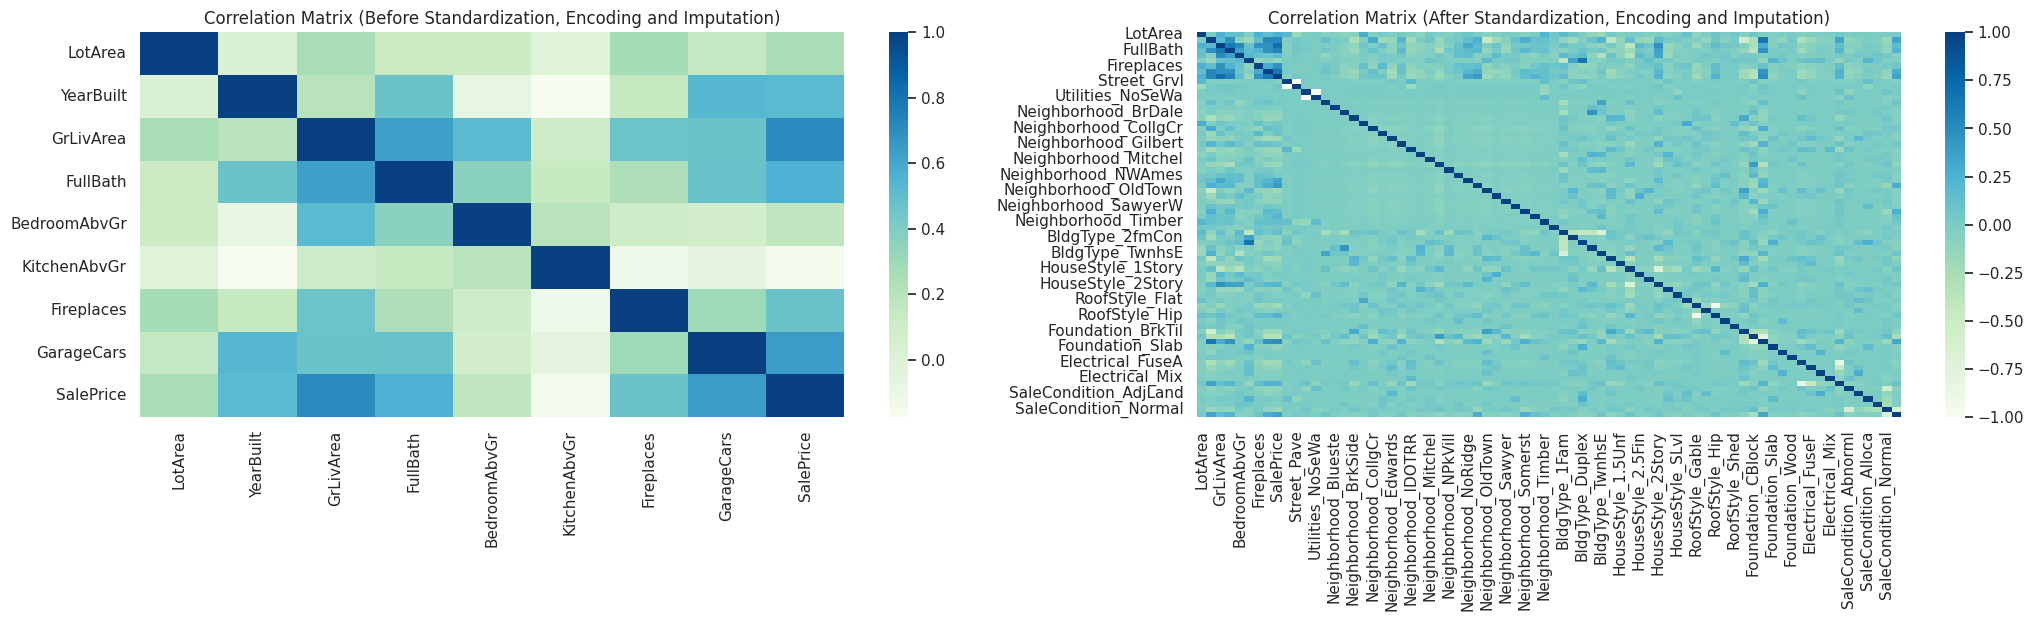

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=housing_encoded.columns)

corr_before = housing.corr()

corr_after = X_scaled_df.corr()

fig, axs = plt.subplots(ncols=2, figsize=(25, 5))
sns.heatmap(corr_before, ax=axs[0],cmap="GnBu")
axs[0].set_title('Correlation Matrix (Before Standardization, Encoding and Imputation)')
sns.heatmap(corr_after, ax=axs[1],cmap="GnBu")
axs[1].set_title('Correlation Matrix (After Standardization, Encoding and Imputation)')
plt.show()

### SPLITTING

In [ ]:
X = X_scaled
y = housing_encoded['SalePrice'].to_numpy()

## CHECKING FEATURE WHICH HAS HIGHEST CORRELATION WITH SALE PRICE

In [ ]:
X_dataframe = pd.DataFrame(X, columns=housing_encoded.columns[:])
y_dataframe = pd.DataFrame(housing_encoded['SalePrice'], columns=['SalePrice'])

corr_matrix = pd.concat([X_dataframe, y_dataframe], axis=1).corr()

correlations = corr_matrix.iloc[-1, :-1]

print(correlations.sort_values(ascending=False).head(5))

SalePrice     1.000000
GrLivArea     0.707047
GarageCars    0.639307
FullBath      0.560112
YearBuilt     0.521700
Name: SalePrice, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(" ")

print("Total number of samples:", len(X_scaled))
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))
print("Sum of samples in train and test:", len(X_train) + len(X_test))

test_size_example = len(X_test) / len(X_scaled)
print("Test size proportion:", test_size_example)

print('''
Checking if train and test split is successful
''')

print("Difference:", np.abs(test_size_example - 0.3))

X_train shape: (1022, 74)
X_test shape: (438, 74)
y_train shape: (1022,)
y_test shape: (438,)
 
Total number of samples: 1460
Number of samples in the training set: 1022
Number of samples in the testing set: 438
Sum of samples in train and test: 1460
Test size proportion: 0.3

Checking if train and test split is successful

Difference: 0.0


## VERIFYING TEST TRAIN SPLIT OVERLAP

In [ ]:
X = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

if any(np.intersect1d(X_train.index, X_test.index)):
    print("The train and test data is mixed.")
else:
    print("The train and test data is not mixed.")

The train and test data is not mixed.


### Since regression model has no confusion matrix, precision and recall. Instead, we may assess the effectiveness of our regression models using regression measures like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared Score.

# MODELS

## 1. LINEAR REGRESSION

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

In [ ]:
residuals = y_train - linreg.predict(X_train)
outlier_threshold = 3*np.std(residuals)
outliers = np.abs(residuals) > outlier_threshold

In [ ]:
linreg_score = 0

if np.all(outliers):
    print("All samples are outliers, cannot fit a linear regression model")
else:
    X_train_cleaned, y_train_cleaned = X_train[~outliers], y_train[~outliers]

    linreg_cleaned = LinearRegression().fit(X_train_cleaned, y_train_cleaned)

    y_pred_cleaned = linreg_cleaned.predict(X_test)

    mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
    rmse_cleaned = np.sqrt(mse_cleaned)
    mae = mean_absolute_error(y_test, y_pred_cleaned)

    r2_score_cleaned = r2_score(y_test, y_pred_cleaned) * 100
  
    linreg_score = r2_score_cleaned
    linreg_mae = mae

    print(f"Mean Squared Error: {mse_cleaned:.2f}")
    print(f"Root Mean Squared Error: {rmse_cleaned:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(" ")
    print(f"R^2 Score: {r2_score_cleaned:.6f}%")

Mean Squared Error: 9127808.41
Root Mean Squared Error: 3021.23
Mean Absolute Error: 162.90
 
R^2 Score: 99.869193%


### OVERFITTING OR UNDERFITTING : LINEAR REGRESSION

In [ ]:
train_accuracy = linreg_cleaned.score(X_train_cleaned, y_train_cleaned)

test_accuracy = linreg_cleaned.score(X_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.9986919338262183


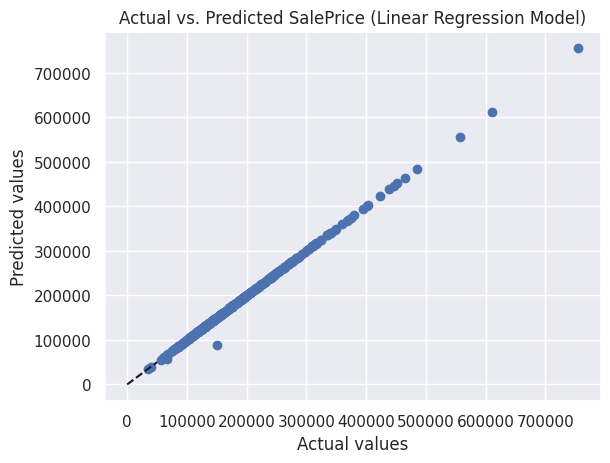

In [ ]:
plt.scatter(y_test, y_pred_cleaned)
plt.plot([0, 50000], [0, 50000], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted SalePrice (Linear Regression Model)')
plt.show()

## 2. K-NEAREST NEIGHBORS (KNN)

In [ ]:
X = housing_encoded.drop(['SalePrice'], axis=1)
y = housing_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

r_scaler = RobustScaler()
x_train_scaled = r_scaler.fit_transform(X_train)
x_test_scaled = r_scaler.transform(X_test)

x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
rmse_val = []
mse_val = []
for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    rmse_val.append(rmse)
    mse_val.append(mse)
    print(f"Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = {k}:    {mse:.2f} | {rmse:.2f}")

Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 1:    1557903521.12 | 39470.29
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 2:    1157418340.21 | 34020.85
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 3:    1250290003.06 | 35359.44
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 4:    1211977628.96 | 34813.47
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 5:    1247589449.35 | 35321.23
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 6:    1326831444.74 | 36425.70
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 7:    1321283401.79 | 36349.46
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 8:    1413894424.29 | 37601.79
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 9:    1453966210.57 | 38130.91
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 10:    1474893638.91 | 38404.34
Mean Squared Error(MSE) | Root Mean Squared Error

Text(0, 0.5, 'RMSE')

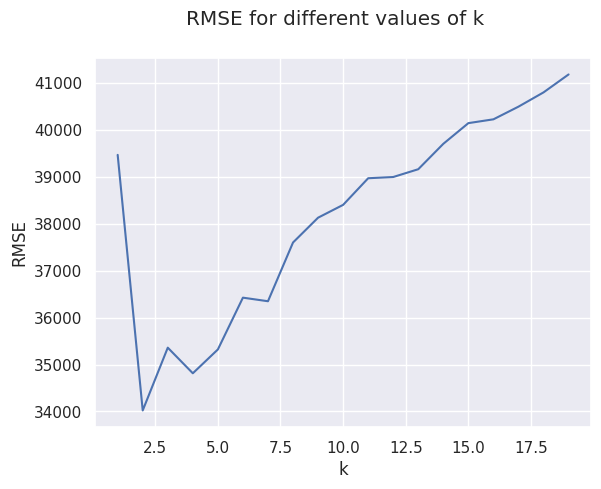

In [ ]:
fig, axs = plt.subplots(1)
fig.suptitle('RMSE for different values of k')
axs.plot(range(1, 20), rmse_val)
axs.set_xlabel('k')
axs.set_ylabel('RMSE')

In [ ]:
optimal_k_rmse = rmse_val.index(min(rmse_val)) + 1
print(f"The optimal value of k based on RMSE is {optimal_k_rmse}")

The optimal value of k based on RMSE is 2


In [ ]:
# Fit the model on the training data using the optimal value of k
k = optimal_k_rmse  # or optimal_k_mse if you prefer
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

neg_preds = []

for pred in y_pred:
    if pred < 0:
        neg_preds.append(pred)
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

min_pred = min(y_pred)
max_pred = max(y_pred)

print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)

No negative predicted values
Minimum predicted value: 43700.0
Maximum predicted value: 577500.0


In [ ]:
test_rmse = sqrt(mean_squared_error(y_test, y_pred))
test_mse = mean_squared_error(y_test, y_pred)

test_r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)

knn_score = test_r2
knn_mae = mae

print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {test_r2:.2f}%")

Mean Squared Error: 1157418340.21
Root Mean Squared Error: 34020.85
Mean Absolute Error: 23201.31
 
R^2 score: 83.41%


### OVERFITTING OR UNDERFITTING : KNN


In [ ]:
train_accuracy = knn_model.score(x_train, y_train)
test_accuracy = knn_model.score(x_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.8897272940138229
Test accuracy: 0.8341354559199484


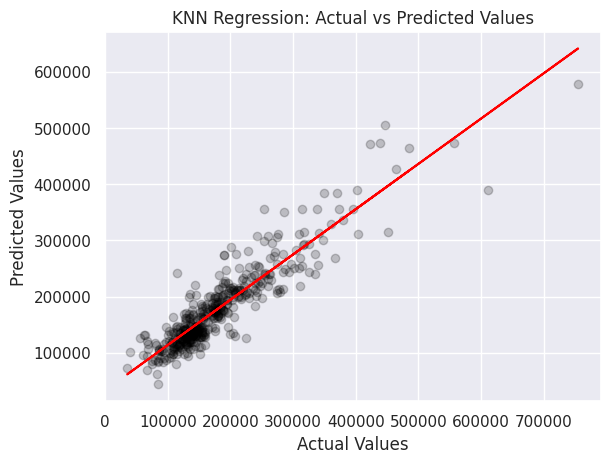

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted Values')
plt.show()

## 3. DECISION TREE REGRESSOR

In [ ]:
X = X_scaled
y = housing_encoded['SalePrice'].to_numpy() 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)    

decisionTreeRegressor = DecisionTreeRegressor()

decisionTreeRegressor.fit(X_train, y_train)

y_pred = decisionTreeRegressor.predict(X_test)



In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

r2 = (decisionTreeRegressor.score(X_test,y_test))*100

dectree_score = r2
dectree_mae = mae

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 Score: {r2:.6f}%")

Mean Squared Error: 7978006.51
Root Mean Squared Error: 2824.54
Mean Absolute Error: 734.61
 
R^2 Score: 99.885671%


### OVERFITTING OR UNDERFITTING : DECISION TREE

In [ ]:
train_accuracy = decisionTreeRegressor.score(X_train, y_train)
test_accuracy = decisionTreeRegressor.score(X_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy) #as we got 1 as result and it is completely fine because the limit is 5-10%

Training accuracy: 1.0
Test accuracy: 0.9988567068915716


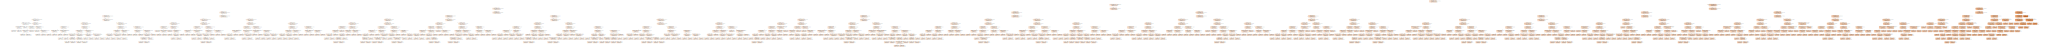

In [ ]:
dot_data = export_graphviz(decisionTreeRegressor, out_file=None,
                           feature_names=list(housing_encoded.columns),
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

display(graph)

## 4. SUPPORT VECTOR MACHINE (SVM)

In [ ]:
X = housing_encoded.iloc[:, 1:8].values
y = housing_encoded.iloc[:, 8].values

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X)
X_train_scaled , X_test_scaled , y_train, y_test = train_test_split(X_train_scaled , y, test_size=0.3, random_state=42)

In [ ]:
svm_model = SVR(kernel='poly', C= 1000000, coef0=0.1)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

neg_preds = []

for pred in y_pred:
    if pred < 0:
        neg_preds.append(pred)
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

min_pred = min(y_pred)
max_pred = max(y_pred)
print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)

No negative predicted values
Minimum predicted value: 10629.97083834937
Maximum predicted value: 720026.0847457999


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)*100

svm_score = r2
svm_mae = mae

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {r2:.2f}%")

Mean Squared Error: 1203696403.34
Root Mean Squared Error: 34694.33
Mean Absolute Error: 24008.21
 
R^2 score: 82.75%


### OVERFITTING OR UNDERFITTING : SVM

In [ ]:
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.8561085509769497
Test accuracy: 0.8275035497412019


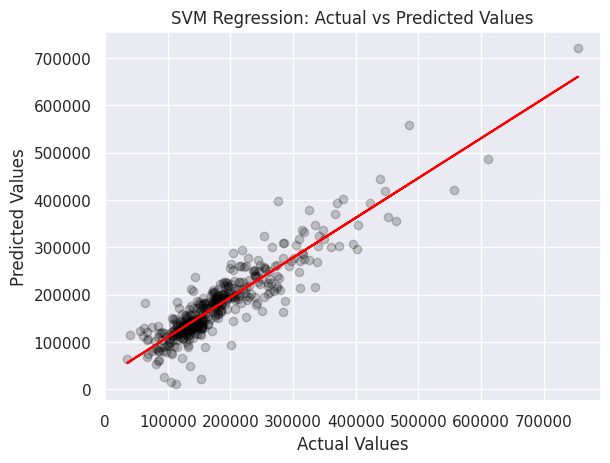

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs Predicted Values')
plt.show()

# OUTPUT AND COMPARATIVE ANALYSIS

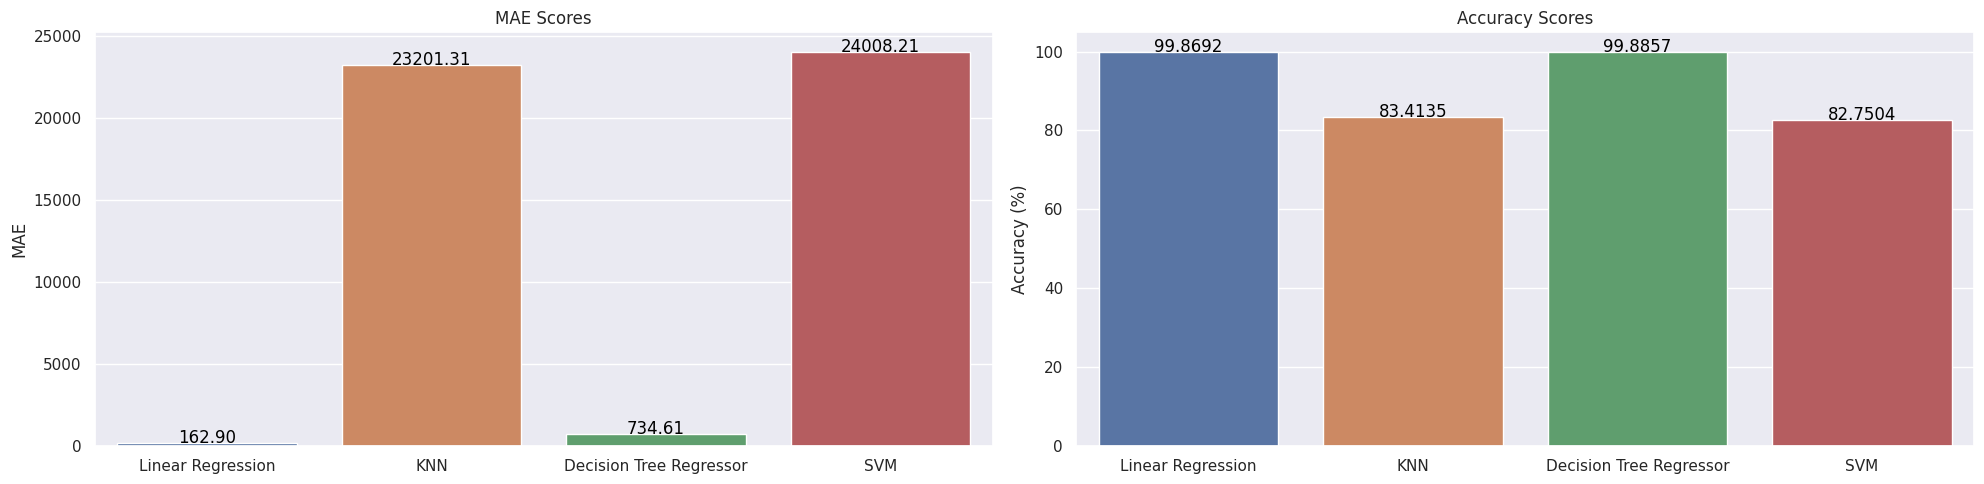

In [ ]:
models = ['Linear Regression', 'KNN', 'Decision Tree Regressor', 'SVM']
mae_scores = [linreg_mae, knn_mae, dectree_mae, svm_mae]
accuracy_scores = [linreg_score, knn_score, dectree_score, svm_score]

sns.set(style="darkgrid")

# Create a Seaborn bar chart with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x=models, y=mae_scores, ax=axs[0])
axs[0].set_title('MAE Scores')
axs[0].set_ylabel('MAE')

for i, v in enumerate(mae_scores):
    axs[0].text(i, v, f"{v:.2f}", color='black', ha="center")


sns.barplot(x=models, y=accuracy_scores, ax=axs[1])
axs[1].set_title('Accuracy Scores')
axs[1].set_ylabel('Accuracy (%)')

for i, v in enumerate(accuracy_scores):
    axs[1].text(i, v, f"{v:.4f}", color='black', ha="center")

fig.tight_layout()
plt.show()

In [ ]:
print(F'''The models prediction accuracy are as follows:
      
Linear Regression: {linreg_score:.4f}%
K-Nearest Neighbors: {knn_score:.4f}%
Decision Tree Regressor: {dectree_score:.4f}%
Support Machine Vector: {svm_score:.4f}%
''')

The models prediction accuracy are as follows:
      
Linear Regression: 99.8692%
K-Nearest Neighbors: 83.4135%
Decision Tree Regressor: 99.8857%
Support Machine Vector: 82.7504%

